In [15]:
# 📦 Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


# 📥 Load the preprocessed and feature-engineered dataset
df = pd.read_csv("data/engineered_events.csv")
df.head()



,user_id,content_id,event_encoded,hour,time_bucket_encoded
0,57,content_34,0,0,0
1,10,content_5,2,0,0
2,78,content_3,2,0,0
3,78,content_31,0,0,0
4,8,content_2,0,0,0


In [8]:
# 🔍 Check which columns are present before encoding
print(df.columns)

Index(['user_id', 'content_id', 'event_encoded', 'hour',
       'time_bucket_encoded'],
      dtype='object')


In [10]:
print(df.columns.tolist())

['user_id', 'content_id', 'event_encoded', 'hour', 'time_bucket_encoded']


In [11]:
# 🎯 Define input features (X) and target variable (y)
X = df[['hour', 'time_bucket_encoded']]
y = df['event_encoded']


In [12]:
# 🧪 Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# 🤖 Initialize models
rf = RandomForestClassifier(random_state=42)
lr = LogisticRegression(max_iter=1000)

# 🚀 Fit models
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [16]:
# 📊 Make predictions
rf_preds = rf.predict(X_test)
lr_preds = lr.predict(X_test)

# 🧾 Show evaluation metrics
print("Random Forest Classification Report:\n", classification_report(y_test, rf_preds))
print("Logistic Regression Classification Report:\n", classification_report(y_test, lr_preds))

print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_preds))


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         5
           2       0.17      1.00      0.29         2
           3       0.00      0.00      0.00         3

    accuracy                           0.17        12
   macro avg       0.04      0.25      0.07        12
weighted avg       0.03      0.17      0.05        12

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         5
           2       0.17      1.00      0.29         2
           3       0.00      0.00      0.00         3

    accuracy                           0.17        12
   macro avg       0.04      0.25      0.07        12
weighted avg       0.03      0.17      0.05        12

Random Forest Accuracy: 0.16666666666666666
Logi

/home/btheard/scalable-streaming-analytics/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/btheard/scalable-streaming-analytics/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/btheard/scalable-streaming-analytics/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

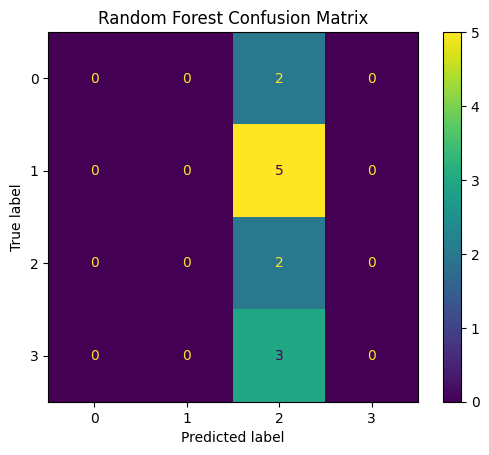

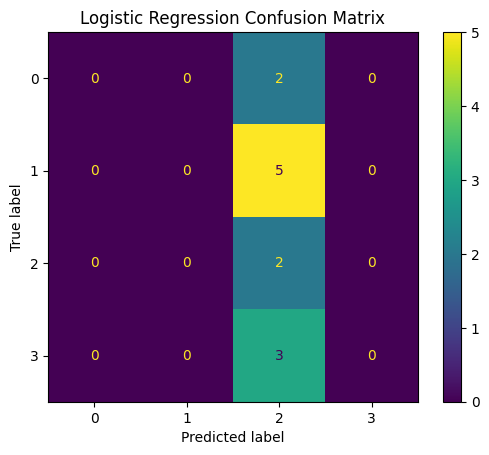

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, rf_preds)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot()
plt.title("Random Forest Confusion Matrix")
plt.show()

# Logistic Regression Confusion Matrix
cm_lr = confusion_matrix(y_test, lr_preds)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp_lr.plot()
plt.title("Logistic Regression Confusion Matrix")
plt.show()


In [18]:
import pandas as pd

# Collect metrics
metrics = {
    "Model": ["Random Forest", "Logistic Regression"],
    "Accuracy": [accuracy_score(y_test, rf_preds), accuracy_score(y_test, lr_preds)],
    "F1 Score (macro avg)": [
        classification_report(y_test, rf_preds, output_dict=True)["macro avg"]["f1-score"],
        classification_report(y_test, lr_preds, output_dict=True)["macro avg"]["f1-score"]
    ]
}

metrics_df = pd.DataFrame(metrics)
metrics_df.to_csv("data/model_metrics.csv", index=False)
print("Model metrics saved to data/model_metrics.csv")


Model metrics saved to data/model_metrics.csv


/home/btheard/scalable-streaming-analytics/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/btheard/scalable-streaming-analytics/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/btheard/scalable-streaming-analytics/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf